In [1]:
import numpy as np
import pandas as pd
from geopy import distance
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df["AggrCoordinates"] = pd.Categorical(df.start_lat.astype(str) + ' ' + df.start_lon.astype(str))
mapping = df.AggrCoordinates.drop_duplicates().to_frame()
mapping['Restaurant'] = np.arange(mapping.shape[0])
df['Restaurant'] = mapping.set_index('AggrCoordinates').reindex(df.AggrCoordinates.values).Restaurant.values
df.drop(columns=["AggrCoordinates"], inplace=True)

In [4]:
df = df.loc[~df.Restaurant.isin(pd.read_csv('groupe_1.csv')['0'].unique())].reset_index(drop = True)

In [5]:
df['Distance'] = df.apply(lambda x: distance.distance((x['start_lat'], x['start_lon']), (x['end_lat'], x['end_lon'])).km, axis = 1)
df["HourTime"] = df.hour  + df.minute / 60

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['Day'] = df.day_of_week.map(dict(zip(days, np.arange(7))))

In [6]:
df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,Restaurant,Distance,HourTime,Day
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69,0,1.614514,13.733333,5
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59,1,2.994697,14.233333,1
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19,2,2.756647,14.650000,6
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79,3,2.450320,12.766667,3
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09,4,3.462698,13.633333,4


In [7]:
df.describe()

,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,hour,minute,fee,Restaurant,Distance,HourTime,Day
count,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000
mean,48.859327,2.342854,75013.010526,48.859453,2.343233,75012.526754,4.464912,4.385965,12.982895,30.579605,1.930636,299.468421,2.517740,13.492555,3.018421
std,0.020620,0.038782,6.642956,0.019642,0.036084,6.668024,2.865501,2.856620,0.822830,16.704607,0.705470,173.205962,1.063849,0.865295,1.997940
min,48.817100,2.229100,75001.000000,48.817100,2.229100,75001.000000,0.000000,0.000000,12.000000,0.000000,0.590000,0.000000,0.104132,12.000000,0.000000
25%,48.843700,2.315100,75009.000000,48.844200,2.315900,75009.000000,2.000000,2.000000,12.000000,17.000000,1.390000,149.000000,1.722865,12.716667,1.000000
50%,48.859100,2.347000,75013.500000,48.859900,2.346700,75013.000000,5.000000,4.000000,13.000000,31.000000,1.890000,300.500000,2.566457,13.500000,3.000000
75%,48.876300,2.372900,75017.000000,48.875300,2.372100,75017.000000,7.000000,7.000000,14.000000,45.000000,2.390000,449.000000,3.324856,14.283333,5.000000
max,48.901500,2.447300,75116.000000,48.901500,2.447300,75116.000000,9.000000,9.000000,14.000000,59.000000,4.690000,599.000000,4.918484,14.983333,6.000000


In [276]:
simulate_with_draw(np.ones(1000000), N = 2).mean()

2.596249

In [307]:
@np.vectorize
def simulate_with_draw(n):
    N = 10 ** 6
    sick = False
    balls = 0
    
    for _ in range(N):
        if sick:
            sick = False
            continue
        
        balls += 2
        if np.random.random() < n / 6:
            sick = True
        else:
            balls += n
            
    return balls / N

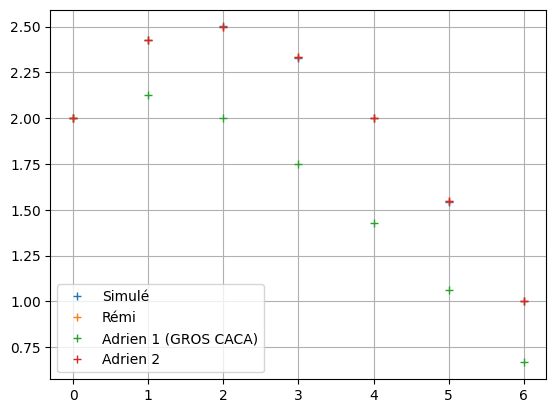

In [317]:
n_balls = np.arange(7)
plt.plot(n_balls, simulate_with_draw(n_balls), "+", label="Simulé")
pn = (1 - (n_balls / 6) / (1 + n_balls / 6))
plt.plot(n_balls, (12 - n_balls ** 2 + 6 * n_balls) / 6 * pn, "+", label="Rémi")
plt.plot(n_balls, ((1 - n_balls / 6) * (n_balls + 2) + n_balls / 3) / (1 + n_balls / 3), "+", label="Adrien 1 (GROS CACA)")
plt.plot(n_balls, (2 + n_balls - (n_balls ** 2) / 6) / (1 + n_balls / 6), "+", label="Adrien 2")

plt.grid()
plt.legend()

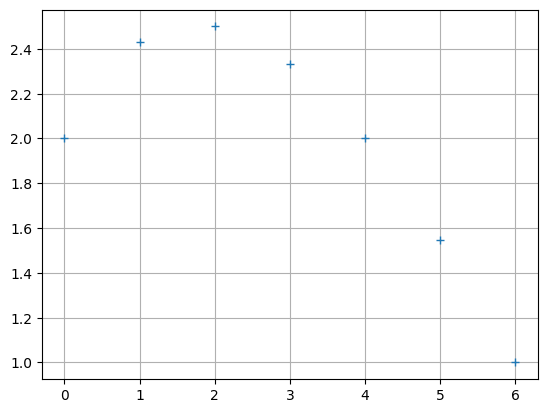

In [315]:
plt.plot(n_balls, (12 - n_balls ** 2 + 6 * n_balls) / 6 * pn, "+", label="Rémi")
plt.grid()

In [242]:
simulate_with_draw(n_balls)

array([2.    , 2.4212, 2.5096, 2.3789, 2.0056, 1.5143, 1.    ])

# Old

<AxesSubplot: >

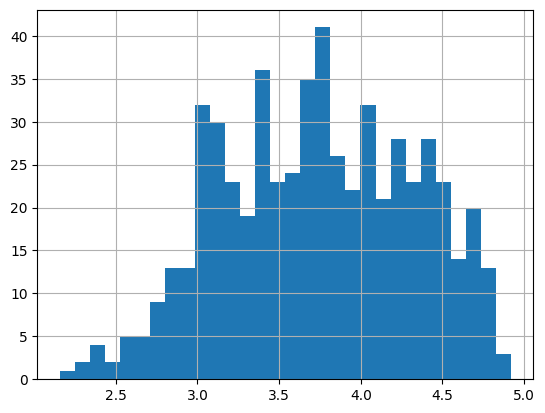

In [8]:
df.groupby('Restaurant').Distance.max().hist(bins = 30)

<AxesSubplot: xlabel='Distance', ylabel='fee'>

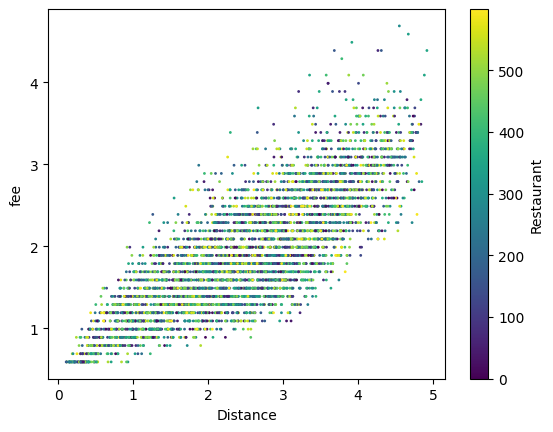

In [9]:
df.plot(kind = 'scatter', x = 'Distance', y = 'fee', c = 'Restaurant', cmap = 'viridis', s = 1)

In [121]:
df.DistCoef.min()

-0.05818432892097072

<AxesSubplot: xlabel='Distance', ylabel='fee'>

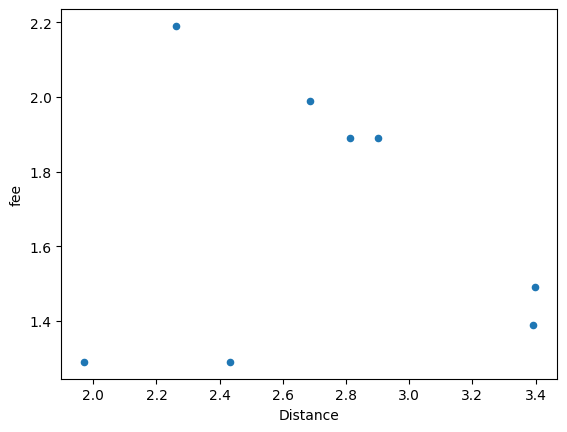

In [123]:
df.loc[df.DistCoef == df.DistCoef.min()].plot.scatter(x = 'Distance', y = 'fee')

<AxesSubplot: >

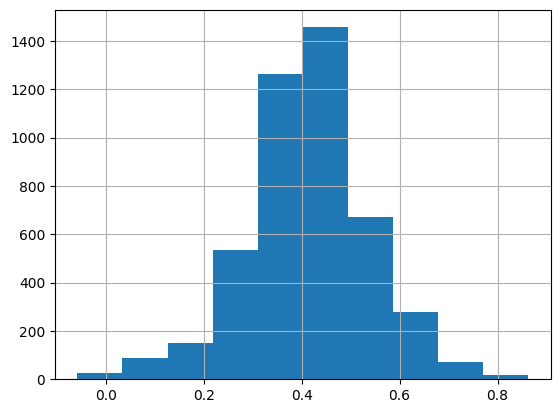

In [133]:
df.DistCoef.hist()

In [141]:
df.loc[df.DistCoef <= 0.1].sort_values(by = 'fee').drop(columns=["observation_uuid", "day_of_week"]).corr()#.plot.scatter(x = 'Distance', y = 'fee')

/var/folders/45/k7633hmj6nq4f2w2vx1w8mdw0000gn/T/ipykernel_48477/2487729442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df.DistCoef <= 0.1].sort_values(by = 'fee').drop(columns=["observation_uuid", "day_of_week"]).corr()#.plot.scatter(x = 'Distance', y = 'fee')


,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,hour,minute,fee,Restaurant,Distance,HourTime,DistCoef,DistIntercept,Day
start_lat,1.000000,-0.287029,0.699174,0.631202,-0.292605,0.048898,-0.197598,0.280576,0.127196,0.049415,0.217868,-0.029701,0.144209,0.138360,-0.234673,0.307935,-0.053775
start_lon,-0.287029,1.000000,0.262128,-0.276381,0.706630,-0.044374,0.047815,0.016518,-0.079336,-0.059054,-0.257474,-0.075662,0.098748,-0.095024,-0.344665,-0.223843,0.216862
start_code_postal,0.699174,0.262128,1.000000,0.415500,0.073242,0.007307,-0.114567,0.216798,0.043926,0.087956,0.015220,-0.327257,0.156269,0.069687,-0.103922,0.033816,-0.019994
end_lat,0.631202,-0.276381,0.415500,1.000000,-0.251711,0.324663,-0.241227,0.162547,-0.033281,-0.056924,0.006905,-0.002044,0.012024,-0.049796,-0.031327,0.148973,-0.139798
end_lon,-0.292605,0.706630,0.073242,-0.251711,1.000000,0.036261,0.068315,-0.051763,-0.246934,0.131346,-0.148249,0.097520,-0.001491,-0.198380,-0.293322,-0.149234,0.251883
end_code_postal,0.048898,-0.044374,0.007307,0.324663,0.036261,1.000000,-0.040950,-0.008918,-0.194849,0.102500,-0.037070,0.138169,-0.136449,-0.156889,0.048606,0.046102,-0.292568
rain,-0.197598,0.047815,-0.114567,-0.241227,0.068315,-0.040950,1.000000,-0.185679,0.031082,-0.044221,0.129336,0.004666,-0.343712,0.016415,0.057213,-0.154966,0.000125
heat,0.280576,0.016518,0.216798,0.162547,-0.051763,-0.008918,-0.185679,1.000000,0.192068,-0.000170,-0.039965,-0.068637,0.156039,0.185817,-0.372293,0.179969,-0.129082
hour,0.127196,-0.079336,0.043926,-0.033281,-0.246934,-0.194849,0.031082,0.192068,1.000000,-0.053466,0.168377,-0.124835,-0.021418,0.951207,-0.159170,0.133120,-0.030123
minute,0.049415,-0.059054,0.087956,-0.056924,0.131346,0.102500,-0.044221,-0.000170,-0.053466,1.000000,0.035009,-0.126939,-0.119508,0.257255,-0.012651,-0.043980,-0.059088


<AxesSubplot: >

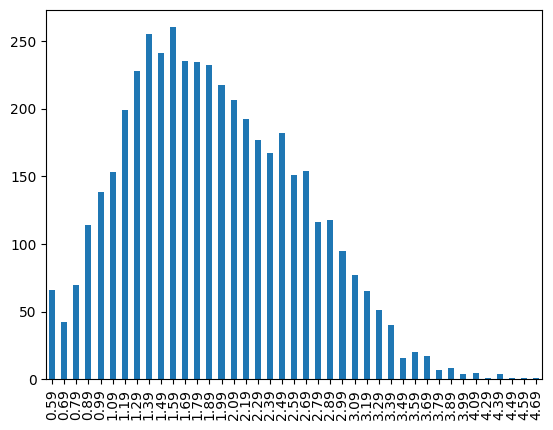

In [10]:
df.fee.value_counts().sort_index().plot.bar()

<AxesSubplot: >

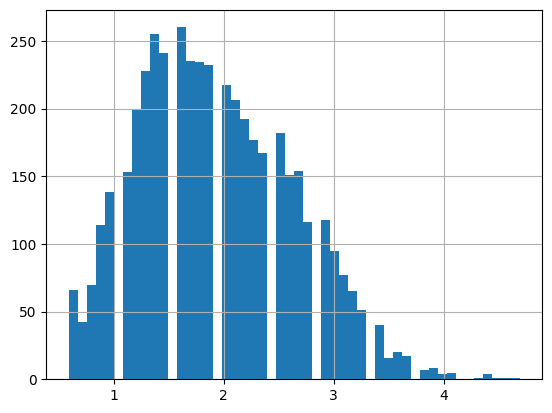

In [11]:
df.fee.hist(bins = 50)

In [35]:
df['MainGroup'] = pd.qcut(df.DistCoef, q = 5, labels = np.arange(5))

df.groupby('MainGroup').apply(lambda x: pd.qcut(x.Distance, q = 10, labels = np.arange(10)))

MainGroup      
0          1       6
           6       5
           10      3
           12      4
           20      9
                  ..
4          4524    9
           4528    2
           4536    3
           4538    1
           4556    7
Name: Distance, Length: 4560, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [78]:
sub_df

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,Restaurant,Distance,HourTime,Group,DistCoef,DistIntercept,MainGroup
56,75a25457-d5a7-161c-6b8a-cec71f7b2da2,48.8467,2.3491,75005,48.8424,2.3476,75005,1,4,Friday,13,18,0.69,59,0.490700,13.300000,0,0.425827,0.539003,0
328,94fc085b-307c-b228-7523-fcc12a4e9db9,48.8383,2.2760,75015,48.8318,2.3216,75014,1,8,Sunday,13,58,2.39,275,3.424789,13.966667,8,0.578234,0.702770,1
520,1e7c6252-291b-91a7-60b7-7fae29466b49,48.8912,2.3298,75018,48.8674,2.3478,75002,0,1,Saturday,14,26,2.59,371,2.957758,14.433333,7,0.511127,0.726873,1
605,a8745175-c158-169c-4f43-90d047e1918a,48.8849,2.2910,75017,48.8759,2.3255,75008,7,9,Tuesday,13,0,2.69,413,2.721211,13.000000,4,0.536878,1.016459,3
626,115d3e44-3adf-6a11-c62d-d64a97fb334b,48.8849,2.2910,75017,48.8825,2.2891,75017,6,7,Tuesday,13,27,0.89,413,0.301086,13.450000,0,0.536878,1.016459,3
724,360cdc9a-020c-fbc0-d66e-e0a416a5b607,48.8467,2.3491,75005,48.8334,2.3473,75013,7,5,Wednesday,12,31,1.09,59,1.484938,12.516667,2,0.425827,0.539003,0
1284,341b580f-00ea-cf3d-21ce-d5d3e39fbc2d,48.8849,2.2910,75017,48.8621,2.3413,75001,0,3,Saturday,13,14,2.99,413,4.477042,13.233333,9,0.536878,1.016459,3
1399,15d8dc3b-b7fe-9c62-f117-eb2c8fd99577,48.8912,2.3298,75018,48.8739,2.3707,75010,5,1,Saturday,13,58,2.49,371,3.563690,13.966667,8,0.511127,0.726873,1
1456,057ff1be-e77b-ebcf-8741-79713063197a,48.8912,2.3298,75018,48.8882,2.3353,75018,8,0,Thursday,14,34,0.99,371,0.523432,14.566667,0,0.511127,0.726873,1
1496,69fbdedc-aa84-8d8c-682d-4e3c70cef137,48.8467,2.3491,75005,48.8276,2.3544,75013,1,6,Saturday,13,27,1.39,59,2.159386,13.450000,4,0.425827,0.539003,0


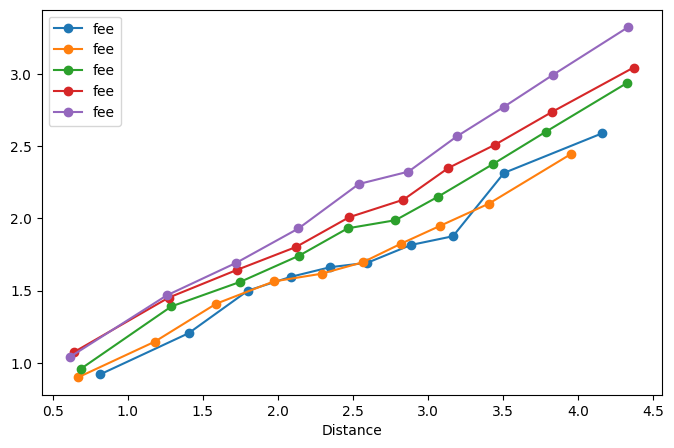

In [37]:
df['MainGroup'] = pd.qcut(df.DistCoef, q = 5, labels = np.arange(5))
df['Group'] = df.groupby('MainGroup').apply(lambda x: pd.qcut(x.Distance, q = 10, labels = np.arange(10))).droplevel(0)
res = df.groupby(['MainGroup', 'Group'])[['Distance', 'fee']].mean()
fig, ax = plt.subplots(1,1,figsize=(8,5))
for k in range(5):
    res.loc[k].set_index('Distance').plot(marker = 'o', label = k, ax = ax)
plt.legend()

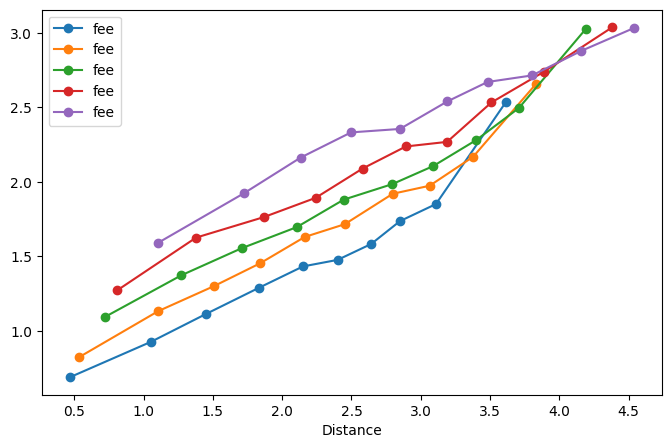

In [38]:
df['MainGroup'] = pd.qcut(df.DistIntercept, q = 5, labels = np.arange(5))
df['Group'] = df.groupby('MainGroup').apply(lambda x: pd.qcut(x.Distance, q = 10, labels = np.arange(10))).droplevel(0)
res = df.groupby(['MainGroup', 'Group'])[['Distance', 'fee']].mean()
fig, ax = plt.subplots(1,1,figsize=(8,5))
for k in range(5):
    res.loc[k].set_index('Distance').plot(marker = 'o', label = k, ax = ax)
plt.legend()

In [14]:
def fit(df, x, y):
    linreg = LinearRegression()
    linreg.fit(df[[x]], df[y])
    return pd.DataFrame([[linreg.coef_[0], linreg.intercept_]])

In [15]:
coefs = df.groupby("Restaurant").apply(lambda x: fit(x, "Distance", "fee")).droplevel(-1)

<AxesSubplot: >

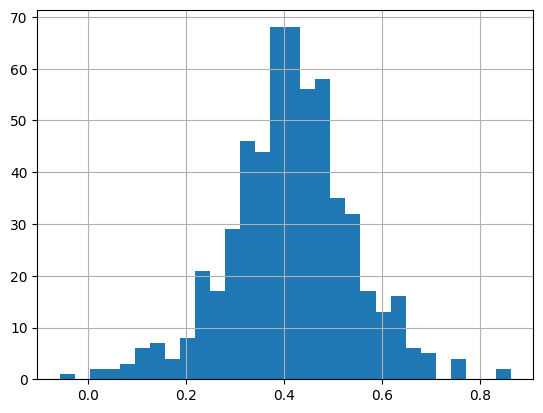

In [16]:
coefs[0].hist(bins = 30)

<AxesSubplot: >

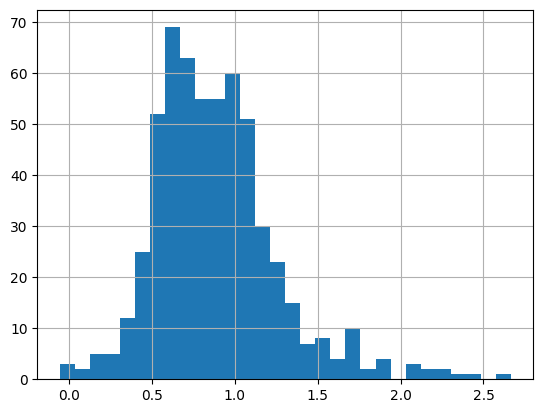

In [17]:
coefs[1].hist(bins = 30)

In [18]:
df[['DistCoef', 'DistIntercept']] = coefs.reindex(df.Restaurant.values).values

<AxesSubplot: xlabel='DistCoef', ylabel='fee'>

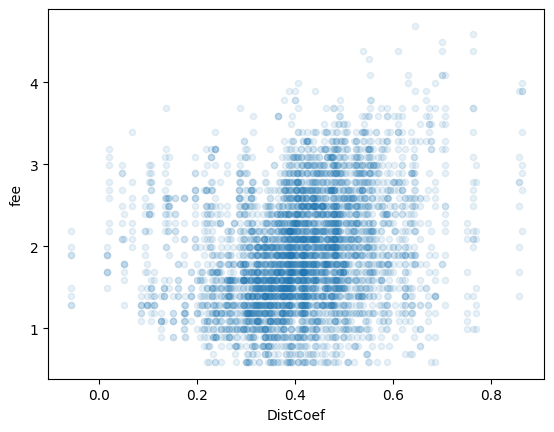

In [19]:
df.plot.scatter(x="DistCoef", y="fee", alpha=0.1)

<AxesSubplot: xlabel='HourTime', ylabel='DistCoef'>

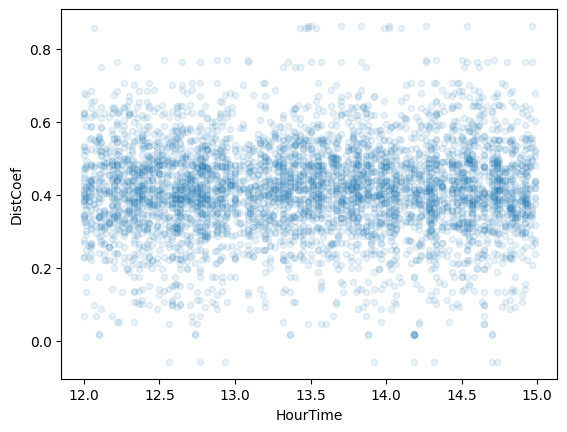

In [30]:
df.plot.scatter(x="HourTime", y="DistCoef", alpha=0.1)

<AxesSubplot: xlabel='HourTime'>

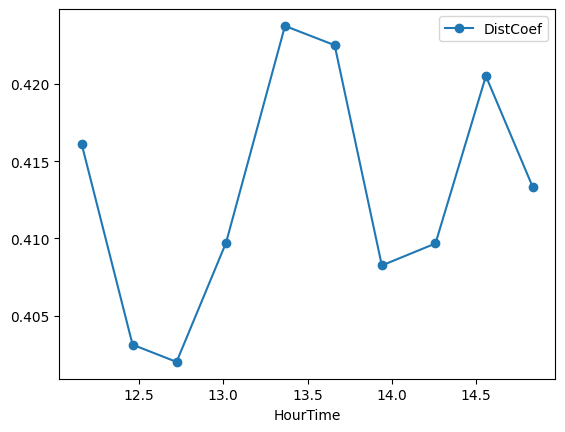

In [31]:
df['Group'] = pd.qcut(df.HourTime, q = 10, labels = np.arange(10))
df.groupby(['Group'])[['HourTime', 'DistCoef']].mean().set_index('HourTime').plot(marker = 'o')

<AxesSubplot: xlabel='HourTime'>

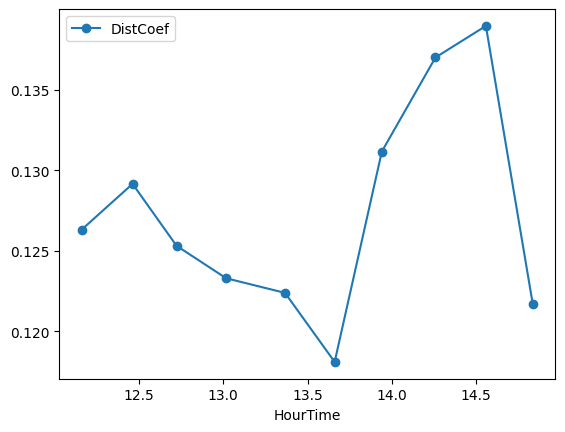

In [33]:
df['Group'] = pd.qcut(df.HourTime, q = 10, labels = np.arange(10))
df.groupby(['Group'])[['HourTime', 'DistCoef']].agg({'HourTime': 'mean', 'DistCoef': 'std'}).set_index('HourTime').plot(marker = 'o')

In [144]:
df.rain.value_counts()

5    520
2    505
9    501
6    457
1    455
3    454
0    445
7    434
4    417
8    372
Name: rain, dtype: int64

In [146]:
df.corr().loc['fee']

/var/folders/45/k7633hmj6nq4f2w2vx1w8mdw0000gn/T/ipykernel_48477/3661097772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['fee']


start_lat           -0.005925
start_lon            0.001827
start_code_postal   -0.048239
end_lat              0.007606
end_lon              0.014850
end_code_postal     -0.065393
rain                 0.114338
heat                -0.026407
hour                 0.190964
minute               0.082623
fee                  1.000000
Restaurant           0.001134
Distance             0.799153
HourTime             0.208176
DistCoef             0.259838
DistIntercept        0.445227
Day                  0.012199
DistRain             0.565688
Name: fee, dtype: float64

<AxesSubplot: xlabel='DistRain', ylabel='fee'>

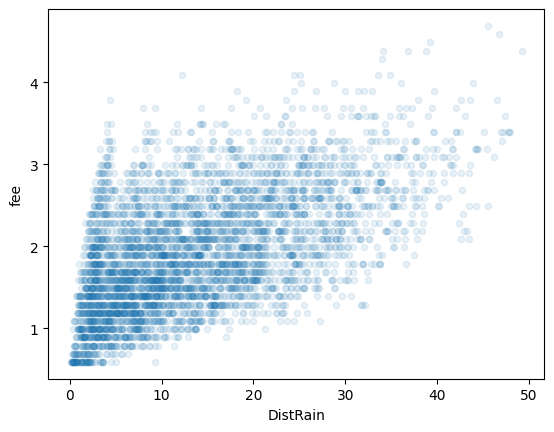

In [175]:
df.plot.scatter(x="DistRain", y="fee", alpha=0.1)

In [223]:
coefs = df.groupby("Restaurant").apply(lambda x: fit(x, "DistRain", "fee")).droplevel(-1)
df[['DistRainCoef', 'DistRainIntercept']] = coefs.reindex(df.Restaurant.values).values

<AxesSubplot: xlabel='DistRain', ylabel='fee'>

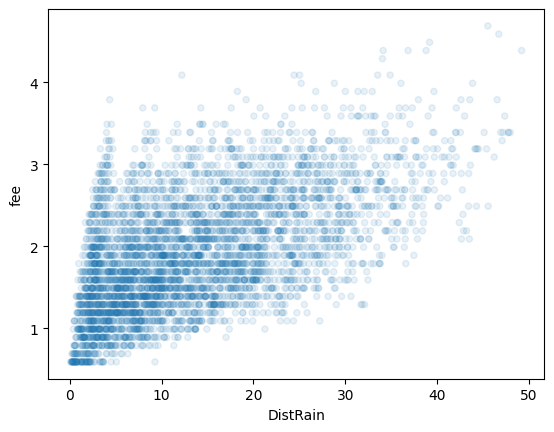

In [228]:
alpha = np.where(df["DistRainCoef"] < 0.1, .1, 0)
df.plot.scatter(x="DistRain", y="fee", alpha=alpha)

<AxesSubplot: xlabel='DistRain', ylabel='fee'>

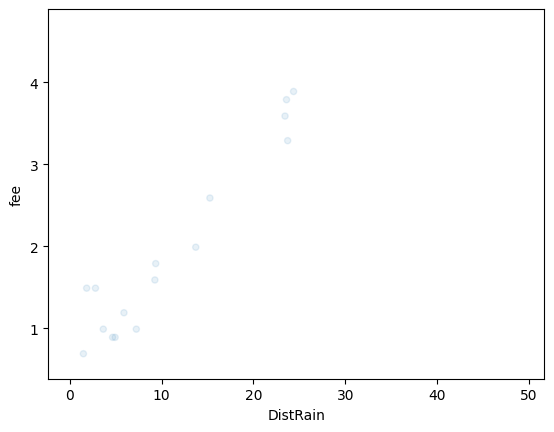

In [227]:
alpha = np.where(df["DistRainCoef"] > 0.1, .1, 0)
df.plot.scatter(x="DistRain", y="fee", alpha=alpha)

<AxesSubplot: xlabel='DistRain', ylabel='fee'>

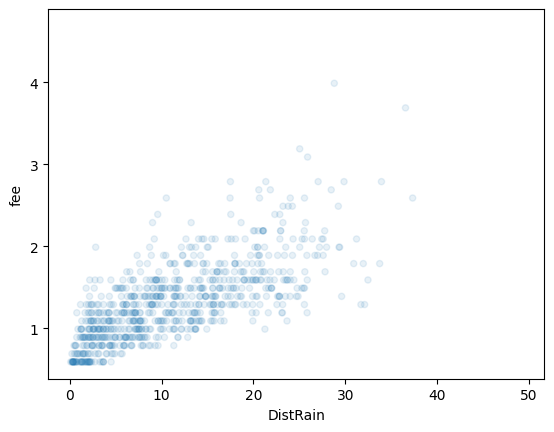

In [231]:
alpha = np.where(df["DistRainIntercept"] < 1, .1, 0)
df.plot.scatter(x="DistRain", y="fee", alpha=alpha)

<AxesSubplot: xlabel='DistRain', ylabel='fee'>

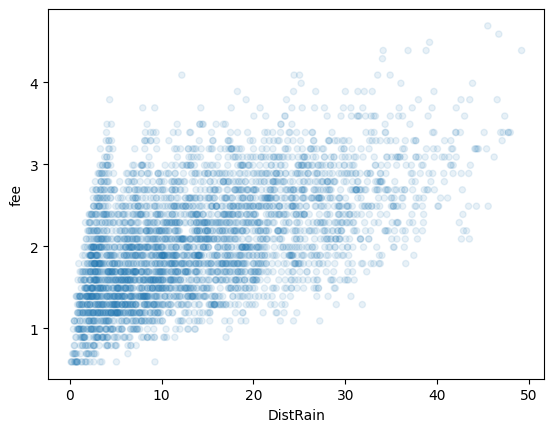

In [232]:
alpha = np.where(df["DistRainIntercept"] > 1, .1, 0)
df.plot.scatter(x="DistRain", y="fee", alpha=alpha)

<AxesSubplot: xlabel='DistRain'>

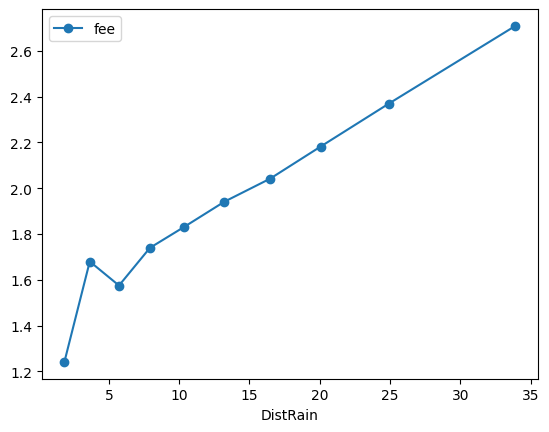

In [145]:
df['DistRain'] = (1+df.rain) * df.Distance
df['Group'] = pd.qcut(df.DistRain, q = 10, labels = np.arange(10))
df.groupby(['Group'])[['DistRain', 'fee']].mean().set_index('DistRain').plot(marker = 'o')

<AxesSubplot: xlabel='HourTime'>

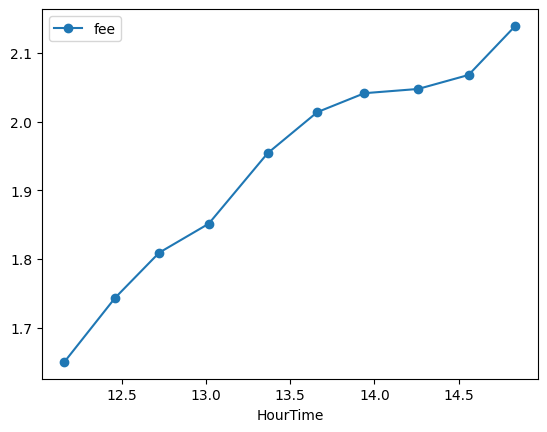

In [22]:
df['Group'] = pd.qcut(df.HourTime, q = 10, labels = np.arange(10))
df.groupby(['Group'])[['HourTime', 'fee']].mean().set_index('HourTime').plot(marker = 'o')

/var/folders/45/k7633hmj6nq4f2w2vx1w8mdw0000gn/T/ipykernel_48477/4137460565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ((df.groupby("end_code_postal").mean().fee - df.fee.mean() ) / df.fee.mean()).plot.bar()


<AxesSubplot: xlabel='end_code_postal'>

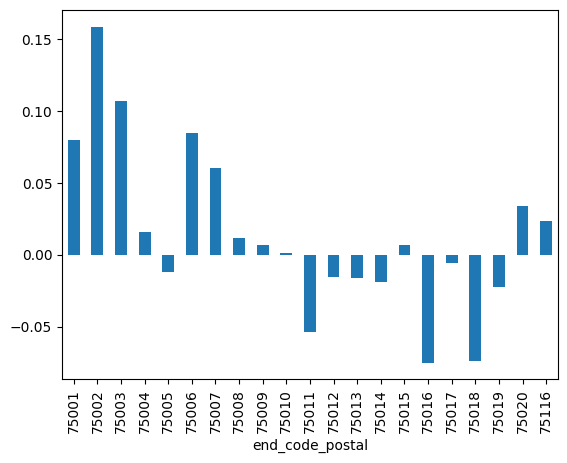

In [25]:
((df.groupby("end_code_postal").mean().fee - df.fee.mean() ) / df.fee.mean()).plot.bar()

/var/folders/45/k7633hmj6nq4f2w2vx1w8mdw0000gn/T/ipykernel_48477/4137460565.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ((df.groupby("end_code_postal").mean().fee - df.fee.mean() ) / df.fee.mean()).plot.bar()


<AxesSubplot: xlabel='end_code_postal'>

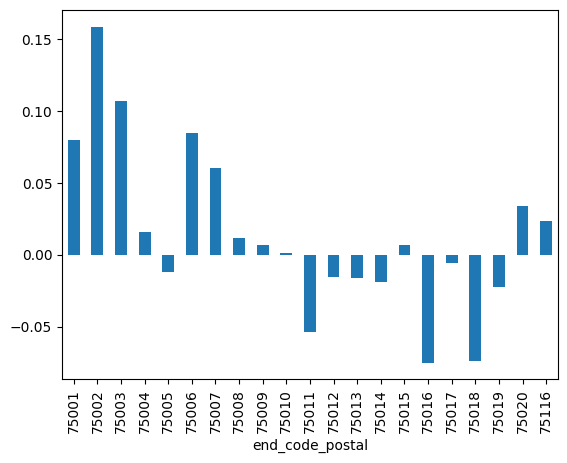

In [26]:
((df.groupby("end_code_postal").mean().fee - df.fee.mean() ) / df.fee.mean()).plot.bar()

<AxesSubplot: xlabel='end_code_postal'>

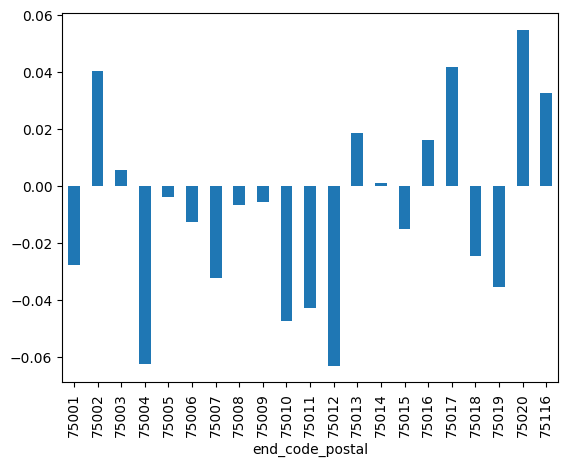

In [27]:
(df.groupby('end_code_postal').fee.std() - df.fee.std()).plot.bar()

In [80]:
df[['heat', 'rain', 'fee']].corr()

,heat,rain,fee
heat,1.000000,-0.029242,-0.026407
rain,-0.029242,1.000000,0.114338
fee,-0.026407,0.114338,1.000000


<AxesSubplot: xlabel='rain'>

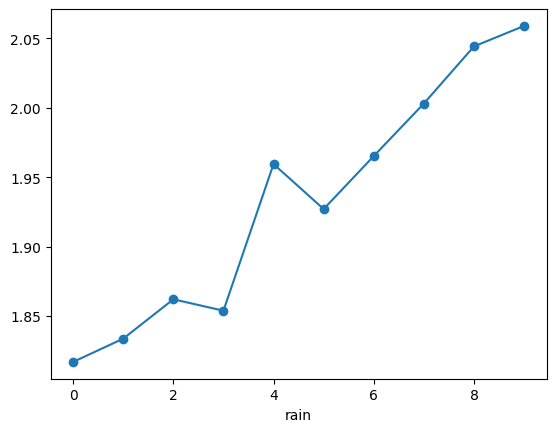

In [82]:
df.groupby('rain').fee.mean().plot(marker = 'o')

In [107]:
group2 = df.groupby(["Restaurant", "rain"]).fee.std().dropna().reset_index().query('fee == 0').sort_values(by = 'Restaurant').Restaurant.tolist()#.plot.scatter(x="rain", y="fee")
group2 = df[df.Restaurant.isin(group2)]
group2

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,Restaurant,Distance,HourTime,Group,DistCoef,DistIntercept,MainGroup
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19,2,2.756647,14.650000,5,0.389444,0.805198,2
6,234131e2-5dce-8477-c9e1-893ec3fb3743,48.8424,2.3476,75005,48.8230,2.3248,75014,3,2,Saturday,12,37,2.09,6,2.730629,12.616667,4,0.154848,1.928999,4
13,de5fe0ee-8010-9500-5ae5-253066b48fc6,48.8721,2.3766,75010,48.8828,2.3892,75019,3,2,Saturday,12,37,0.89,13,1.506684,12.616667,2,0.404341,0.311547,0
14,28ef1f7c-347c-c539-15ea-9628ee845e1d,48.8276,2.3544,75013,48.8306,2.3387,75014,3,0,Saturday,12,45,1.39,14,1.200030,12.750000,0,0.347958,1.205483,4
32,6b1c08c4-e469-f108-9289-4e79be8b0f6b,48.8761,2.3061,75008,48.8789,2.3278,75009,6,8,Monday,12,34,1.59,32,1.621889,12.566667,2,0.613050,0.493252,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,f170b8cc-1527-05e5-003d-0a83e5ccaf94,48.8940,2.3771,75019,48.8940,2.3365,75018,3,4,Sunday,13,21,2.09,164,2.977074,13.350000,7,0.762880,0.643759,1
4527,a54c0f21-f7d2-c902-6490-e67cafe03071,48.8347,2.4003,75012,48.8722,2.3907,75020,3,8,Saturday,14,33,3.19,189,4.229348,14.550000,9,0.496023,0.984812,3
4534,600ae5d2-d6c4-086d-65db-0d811bc6b506,48.8278,2.3797,75013,48.8294,2.3222,75014,6,6,Sunday,14,11,2.89,427,4.225544,14.183333,9,0.471772,0.918310,2
4535,ff9e16ef-3a0b-9373-567f-fb07cbc96874,48.8644,2.3332,75001,48.8640,2.3552,75003,8,6,Tuesday,13,15,1.39,289,1.614764,13.250000,2,0.418645,0.702364,1


In [118]:
df.corr().loc['fee'].sort_values()

/var/folders/45/k7633hmj6nq4f2w2vx1w8mdw0000gn/T/ipykernel_48477/3359355625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['fee'].sort_values()


end_code_postal     -0.065393
start_code_postal   -0.048239
heat                -0.026407
start_lat           -0.005925
Restaurant           0.001134
start_lon            0.001827
end_lat              0.007606
end_lon              0.014850
minute               0.082623
rain                 0.114338
hour                 0.190964
HourTime             0.208176
DistCoef             0.259838
DistIntercept        0.445227
Distance             0.799153
fee                  1.000000
Name: fee, dtype: float64

<AxesSubplot: >

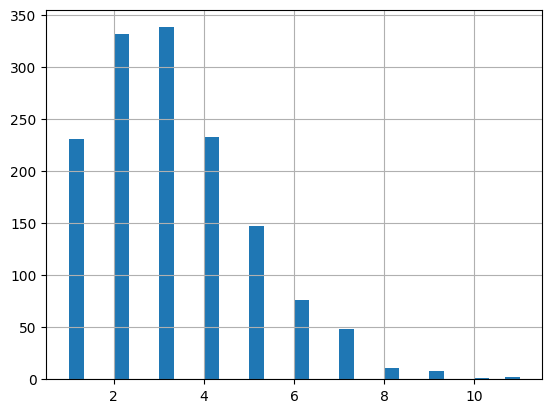

In [206]:
df[["end_lat", "end_lon"]].value_counts().hist(bins=30)

<AxesSubplot: xlabel='Restaurant', ylabel='Distance'>

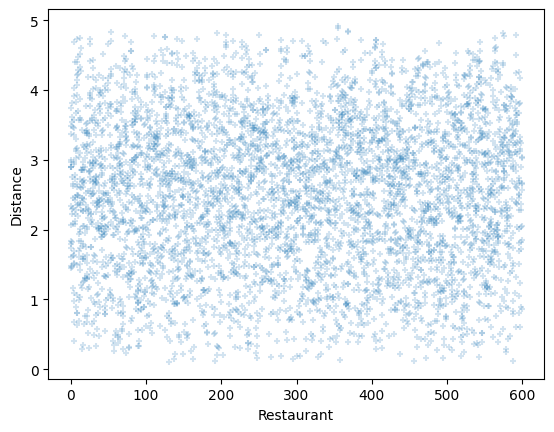

In [218]:
df.plot.scatter(x="Restaurant", y="Distance", alpha=0.2, marker="+")